# Flare Simulation Test

In [49]:
import simulate_flare
import numpy as np

# Define time array, e.g. 3 days sampled every minute:
t = np.arange(0, 3*24*60, 2)  # in minutes
# Convert to hours
# t_hours = t / 60.0

# Base half-peak timescale
t_half = 4.32/120 #5 #5e-5  # e.g. 5 minutes

## Seed for reproducibility
np.random.seed(2453)

# Simulate 20 flares using Pareto for amplitudes
#, flare_states
flare_lightcurve, flare_times = simulate_flare.kepler_flare(
    t,       # time array
    t_half,        # base half-peak width
    20,            # number of flares
    flux_dist=simulate_flare.rpareto,   # amplitude distribution
    xm=1.0, alpha=1.2, offset=0.2, upper=5.0
    # xm=1, alpha=1, offset=30, upper=150
)

# 'flare_lightcurve, flare_states' is now a synthetic “flux” from flares alone;
# 'flare_states' marks which time steps are baseline (1), rising (2), or decaying (3).

# Check
# flare_times

## Plot

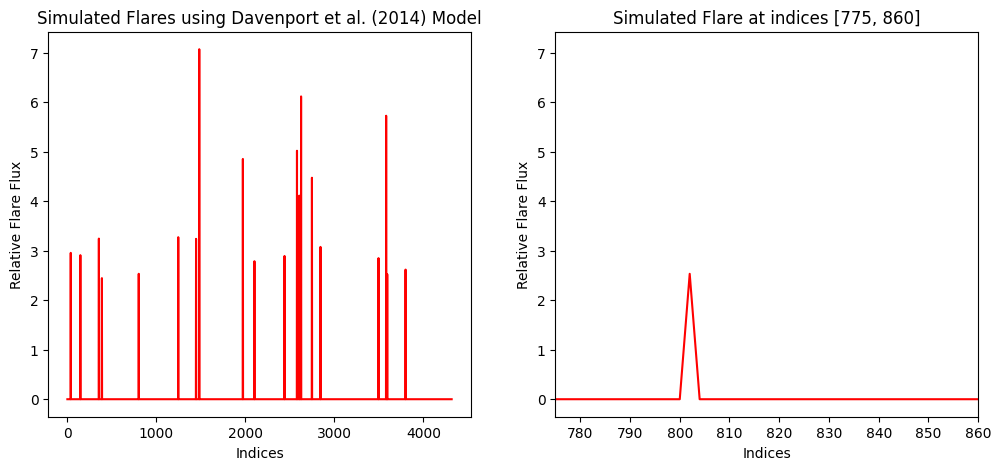

In [50]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 5)) # 1 row, 2 columns

ax[0].plot(t, flare_lightcurve, 'r-')
ax[0].set_xlabel("Indices")
ax[0].set_ylabel("Relative Flare Flux")
ax[0].set_title("Simulated Flares using Davenport et al. (2014) Model")

## Zoom in
ax[1].plot(t, flare_lightcurve, 'r-')
ax[1].set_xlim((775,860))
# ax[1].set_ylim((0, 3))
ax[1].set_xlabel("Indices")
ax[1].set_ylabel("Relative Flare Flux")
ax[1].set_title("Simulated Flare at indices [775, 860]")

plt.show()

# Flare Simulations

[   0    1    2 ... 4995 4996 4997]


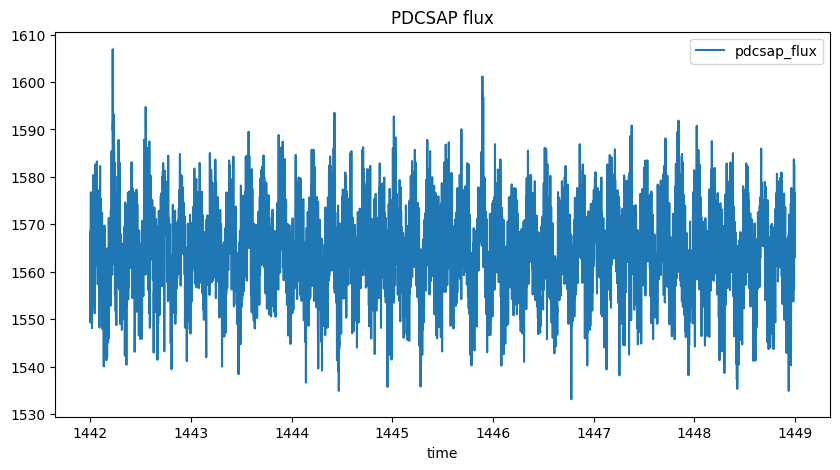

In [51]:
## Data
import pandas as pd

pdcsap = pd.read_csv("../data/raw/031381302.csv", index_col = 'time').loc[:, ["pdcsap_flux"]].dropna()
# Check
# pdcsap.info()

# Calm interval
pdcsap = pdcsap.query("1442 <= index <= 1449")
# Check
pdcsap.plot(y = "pdcsap_flux", title = "PDCSAP flux", figsize = (10, 5))

# Times
# print(pdcsap.shape)
inds = np.arange(pdcsap.shape[0]); print(inds)

## Standard (Varied) Flares

In [52]:
## Seed for reproducibility
np.random.seed(1357) #2453

## Standard Flares
num_flares = 5
# Base half-peak timescale: larger values => all flares last longer (relative to their amplitudes)
t_half = 4.32/120 #5e-5
# Flare ampltiude (Pareto) parameters
xm = pdcsap['pdcsap_flux'].mean() * 0.01 #0.05         # Scale (~ x_min): Baseline amplitude (values will rarely be smaller than this)
alpha = 0.65 #2                                          # Shape: smaller => heavier tail = more large flares
offset = 0                                              # Offset amplitudes (shift)
upper = pdcsap['pdcsap_flux'].mean() * 0.15             # Amplitude cap
# xm = pdcsap['pdcsap_flux'].mean() * 0.02        # Scale (~ x_min): Baseline amplitude (values will rarely be smaller than this)
# alpha = 2                                       # Shape: smaller => heavier tail = more large flares
# offset = 0                                      # Offset amplitudes (shift)
# upper = pdcsap['pdcsap_flux'].mean() * 0.1      # Amplitude cap
print(upper)
# xm = 10         # Scale (~ x_min): Baseline amplitude (values will rarely be smaller than this)
# alpha = 1       # Shape: smaller => heavier tail = more large flares.
# offset = 30     # Offset amplitudes (shift)
# upper = 150     # Amplitude cap

# Simulate flares using Pareto for amplitudes
flare_lightcurve, flare_times = simulate_flare.kepler_flare(
    inds,                           # time array
    t_half,                         # base half-peak width
    num_flares,                     # number of flares
    flux_dist=simulate_flare.rpareto,   # amplitude distribution
    xm=xm, alpha=alpha, offset=offset, upper=upper
)

# 'flare_lightcurve, flare_states' is now a synthetic “flux” from flares alone;
# 'flare_states' marks which time steps are baseline (1), rising (2), or decaying (3).

234.66240060624247


In [53]:
## Injection
inj_std = pdcsap.copy()
inj_std["pdcsap_flux"] += flare_lightcurve

# flare_lightcurve, flare_states.sum()
# inj_std

inj_std.to_csv('../data/processed/031381302_inj_std.csv')
# flare_lightcurve.to_csv('./flares_std.csv')
flare_std = flare_lightcurve
flare_std_times = flare_times

## Plot

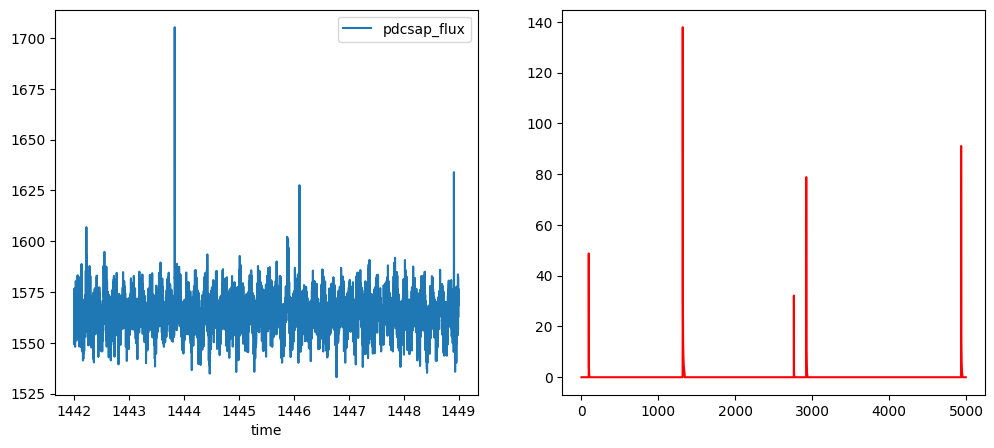

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5)) # 1 row, 2 columns

# Injected Time Series
inj_std.plot(ax = ax[0])

# Simulated Flares
ax[1].plot(inds, flare_lightcurve, 'r-')

plt.show()

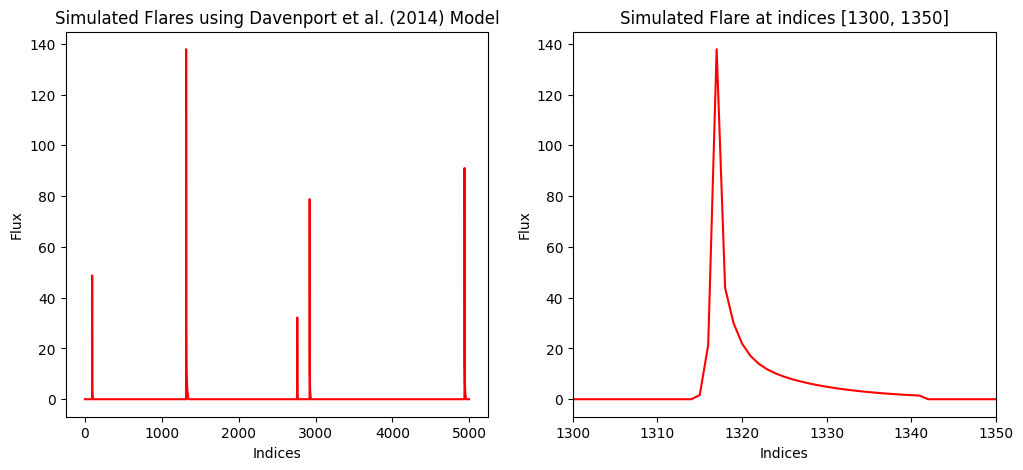

In [62]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 5)) # 1 row, 2 columns

ax[0].plot(inds, flare_lightcurve, 'r-')
ax[0].set_xlabel("Indices")
ax[0].set_ylabel("Flux")
ax[0].set_title("Simulated Flares using Davenport et al. (2014) Model")

## Zoom in
ax[1].plot(inds, flare_lightcurve, 'r-')
ax[1].set_xlim((1300,1350))
# ax[1].set_ylim((0, 3))
ax[1].set_xlabel("Indices")
ax[1].set_ylabel("Flux")
ax[1].set_title("Simulated Flare at indices [1300, 1350]")

plt.show()

In [56]:
## Save Flares
np.savez("test_flares.npz", flare_std=flare_std, flare_std_times=flare_std_times)

## High-Emission Flares

In [ ]:
## Seed for reproducibility
np.random.seed(987)

## Large Flares
num_flares = 5
# Base half-peak timescale: larger values => all flares last longer (relative to their amplitudes)
t_half = 4.32/120 #2.5
# Flare ampltiude (Pareto) parameters
xm = pdcsap['pdcsap_flux'].mean() * 0.05        # Scale (~ x_min): Baseline amplitude (values will rarely be smaller than this)
alpha = 2                                       # Shape: smaller => heavier tail = more large flares
offset = 0                                      # Offset amplitudes (shift)
upper = pdcsap['pdcsap_flux'].mean() * 0.25     # Amplitude cap
print(upper)
# xm = 50         # Scale (~ x_min): Baseline amplitude (values will rarely be smaller than this)
# alpha = 1       # Shape: smaller => heavier tail = more large flares.
# offset = 0      # Offset amplitudes (shift)
# upper = 300     # Amplitude cap

# Simulate flares using Pareto for amplitudes
flare_lightcurve, flare_times = simulate_flare.kepler_flare(
    inds,                           # time array
    t_half,                         # base half-peak width
    num_flares,                     # number of flares
    flux_dist=simulate_flare.rpareto,   # amplitude distribution
    xm=xm, alpha=alpha, offset=offset, upper=upper
)

## Injection
inj_high = pdcsap.copy()
inj_high["pdcsap_flux"] += flare_lightcurve

inj_high.to_csv('./031381302_inj_high.csv')
# flare_lightcurve.to_csv('./flares_high.csv')
flare_high = flare_lightcurve
flare_high_times = flare_times

391.10400101040415


## Plot

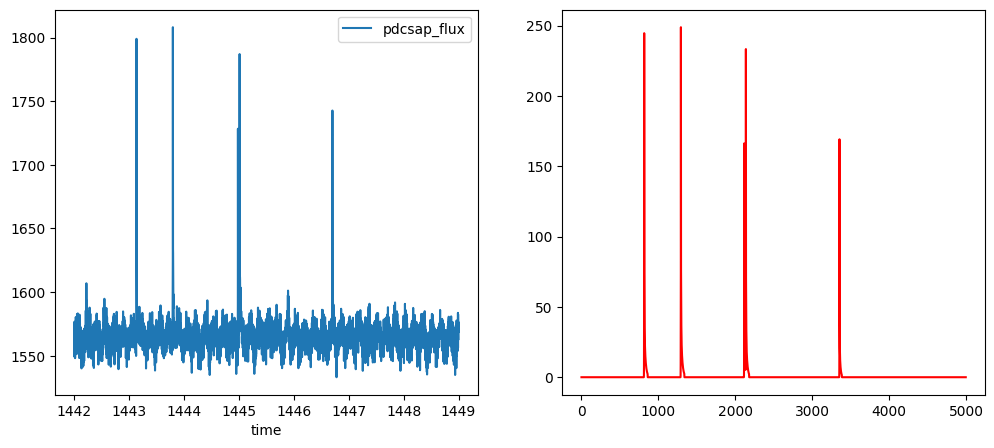

In [73]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5)) # 1 row, 2 columns

# Injected Time Series
inj_high.plot(ax = ax[0])

# Simulated Flares
ax[1].plot(inds, flare_lightcurve, 'r-')

plt.show()

## Low-Emission Flares

In [ ]:
## Seed for reproducibility
np.random.seed(2025)

## Large Flares
num_flares = 5
# Base half-peak timescale: larger values => all flares last longer (relative to their amplitudes)
t_half = 4.32/120 #2.5
# Flare ampltiude (Pareto) parameters
xm = pdcsap['pdcsap_flux'].mean() * 0.005 #5                # Scale (~ x_min): Baseline amplitude (values will rarely be smaller than this)
alpha = 1.5 #1                                              # Shape: smaller => heavier tail = more large flares
offset = 0 #pdcsap['pdcsap_flux'].mean() * 0.005 #10        # Offset amplitudes (shift)
upper = pdcsap['pdcsap_flux'].mean() * 0.05 #1.0 #150       # Amplitude cap
print(upper)

# Simulate flares using Pareto for amplitudes
flare_lightcurve, flare_times = simulate_flare.kepler_flare(
    inds,                           # time array
    t_half,                         # base half-peak width
    num_flares,                     # number of flares
    flux_dist=simulate_flare.rpareto,   # amplitude distribution
    xm=xm, alpha=alpha, offset=offset, upper=upper
)

## Injection
inj_low = pdcsap.copy()
inj_low["pdcsap_flux"] += flare_lightcurve

inj_low.to_csv('./031381302_inj_low.csv')
# flare_lightcurve.to_csv('./flares_low.csv')
flare_low = flare_lightcurve
flare_low_times = flare_times

78.22080020208084


## Plot

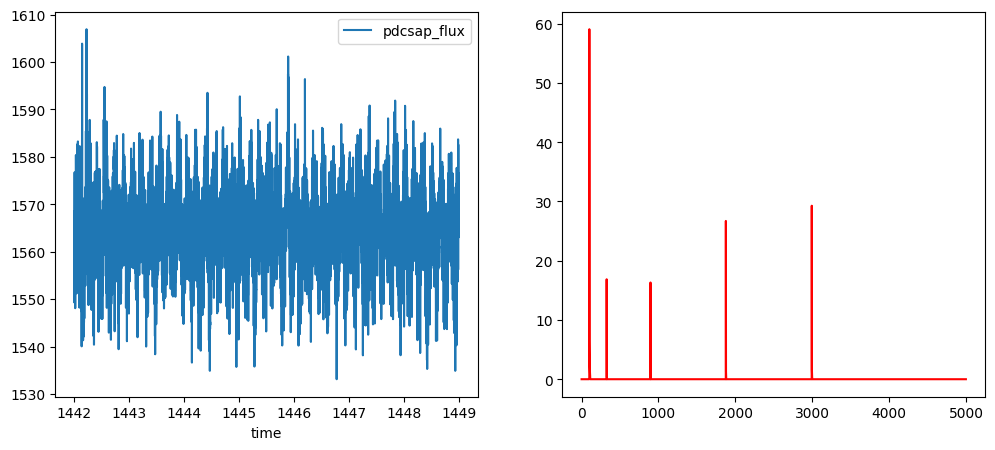

In [76]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5)) # 1 row, 2 columns

# Injected Time Series
inj_low.plot(ax = ax[0])

# Simulated Flares
ax[1].plot(inds, flare_lightcurve, 'r-')

plt.show()

In [ ]:
## Save Flares
np.savez("test_flares.npz", flare_std=flare_std, flare_std_times=flare_std_times,\
         flare_high=flare_high, flare_high_times=flare_high_times, flare_low=flare_low, flare_low_times=flare_low_times)

NameError: name 'flare_high' is not defined